### Bu proje, MNIST veri seti kullanılarak el yazısı rakamları tanımak için bir yapay zeka modelini eğitir.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')

In [8]:
# 70000 satır 784 sütun olması lazım
mnist.data.shape

(70000, 784)

In [22]:
# Mniset veriseti içerisindeki rakamları gösteren fonksiyon
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

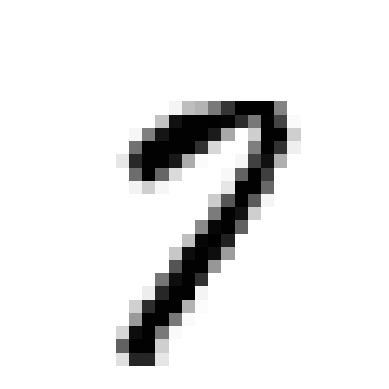

In [30]:
# 10000. fotoğrafa bakalım
showimage(mnist.data, 9999)

In [32]:
# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [34]:
# train_img kopyalıyoruz değiştireceğimiz için
test_img_copy = test_img.copy()

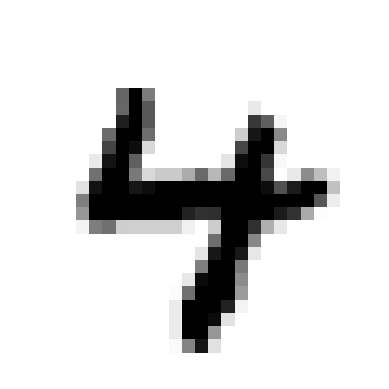

In [38]:
showimage(test_img_copy, 15)

In [42]:
# Verileri scale ediyorum
# Veriler scale edilmezse PCA hatalı sonuçlar verebilir

scaler = StandardScaler()

# Scaler'ı sadece trainin set üzerinde fit etmemiz yeterli
scaler.fit(train_img)

# Transform işlemini hem training sete hem de test sete yapmamız gerekiyor
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [44]:
# PCA uyguluyorum
# Variance'nin %93 oranında korunmasını istediğimi belirtiyorum
pca = PCA(.93)